# Finding the Best Muncipality in Allegheny County
### Utkarsh Tiwari and Akhil Bodahanapati Final Project

#### Best Metric Basis

Our primary metric for success focuses on overall wellbeing, which is measured through a comprehensive assessment of three key factors:

1. **Financial Wellbeing**  
   This factor considers the stability, growth, and sustainability of financial resources, including income, savings, and investments. It assesses the ability to manage financial obligations effectively while preparing for the future.

2. **Physical Wellbeing**  
   Physical wellbeing reflects the state of health, energy levels, and resilience of individuals. It includes factors such as physical activity, nutrition, medical health, and overall physical fitness, which are essential for maintaining a high quality of life.

3. **Asset Wellbeing**  
   This aspect measures the value and growth potential of owned assets, both tangible and intangible. It considers factors like property, investments, and personal assets that contribute to long-term financial security and personal satisfaction.

Together, these factors provide a holistic view of overall wellbeing, guiding us in creating balanced and sustainable outcomes for our stakeholders.

#### Datasets used to Achieve this

1.  **Property Assesment**
2.  **Community Survey (Income)**
3. **Median Age of Death**

#### Setup
Let's import all of the neccesary packages to start finding the best city


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline




#### Property Assesment

To determine if the municipality holds monetary value, we will evaluate both the average square footage and the sale price. This analysis will help us identify the top communities through a comprehensive property assessment.




In [4]:
property = pd.read_csv("property.csv", low_memory=False)
property.head(10)


FileNotFoundError: [Errno 2] No such file or directory: 'property.csv'

Now that we have a glimpse of the data let's get the Mean and Median Square Footage.

**AVERAGE SQAUREFOOTAGE BY CITY**

In [83]:
city_group = property.groupby('PROPERTYCITY').agg({
    'FINISHEDLIVINGAREA': ['mean', 'median'],
}).reset_index()

# Flatten the MultiIndex columns
city_group.columns = ['PROPERTYCITY', 'FINISHEDLIVINGAREA_MEAN', 'FINISHEDLIVINGAREA_MEDIAN']
# Assuming city_group DataFrame is already created
top_10_cities = city_group.sort_values(by='FINISHEDLIVINGAREA_MEAN', ascending=False)
top_10_cities.head(10)



,PROPERTYCITY,FINISHEDLIVINGAREA_MEAN,FINISHEDLIVINGAREA_MEDIAN
4,BADEN,3308.536082,2955.5
48,MARS,3144.628747,2920.0
77,PRESTO,3135.917391,2804.0
82,SEWICKLEY,2569.204400,2281.0
100,WEXFORD,2549.950398,2380.0
11,BRADFORD WOODS,2416.294235,2310.0
49,MC DONALD,2210.753190,2204.0
35,GIBSONIA,2205.016949,1971.5
46,LEETDALE,2175.000000,2175.0
45,JEFFERSON HILLS,2089.500000,1929.5


**This enhanced table offers a clear overview of the top 10 cities with the highest average square footage. Next, let’s visualize this data to identify which city boasts the most spacious properties.**

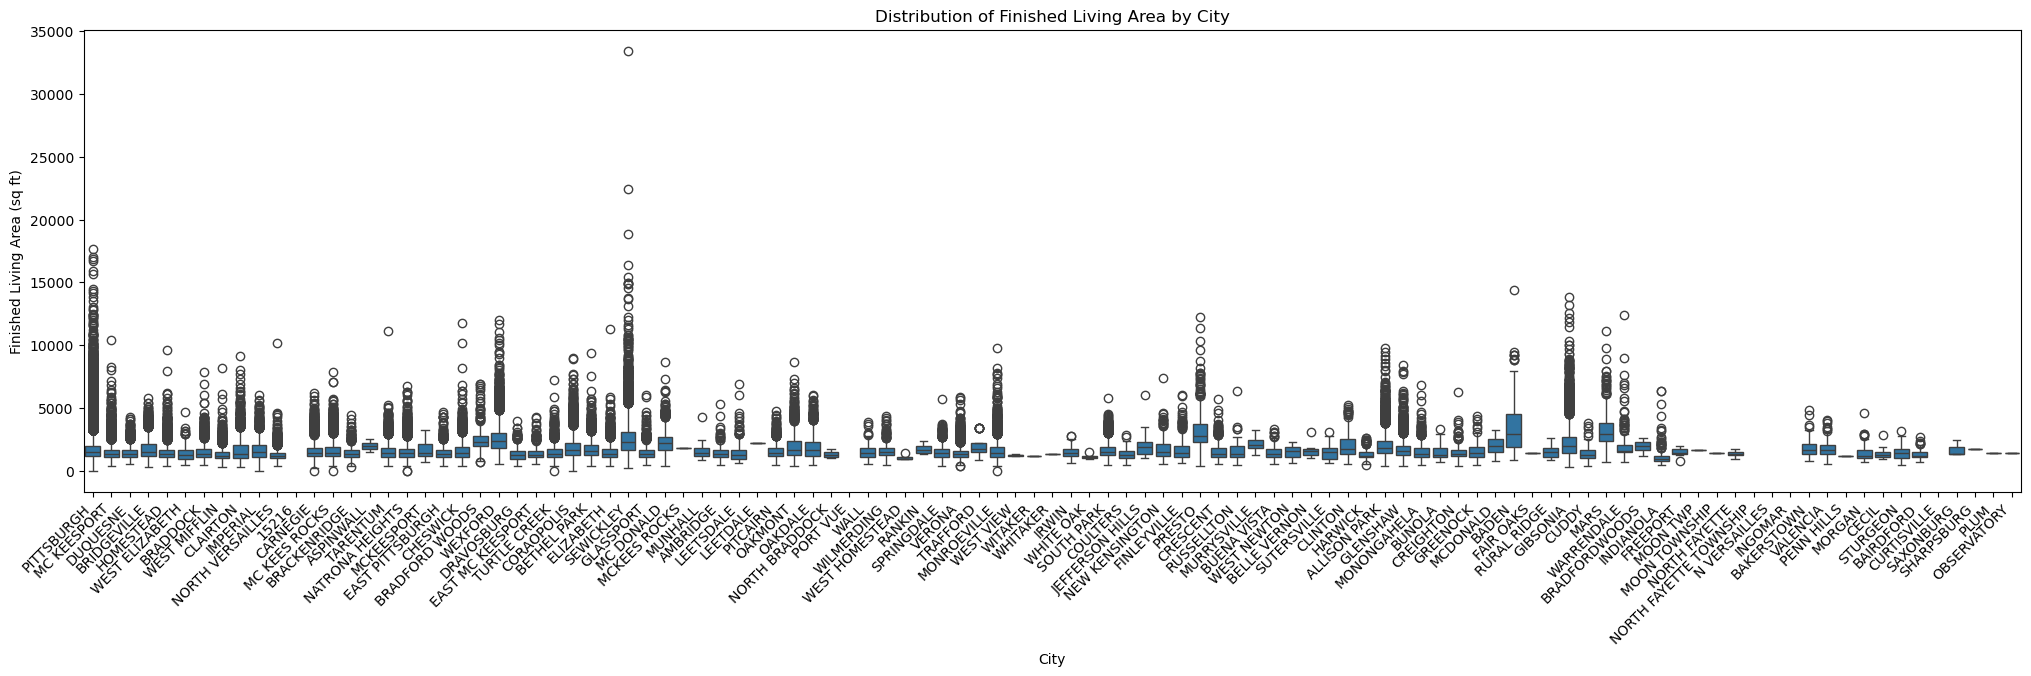

<Figure size 640x480 with 0 Axes>

In [63]:
plt.figure(figsize=(25, 6))
sns.boxplot(data=property, x='PROPERTYCITY', y='FINISHEDLIVINGAREA')
plt.title('Distribution of Finished Living Area by City')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Finished Living Area (sq ft)')
plt.xlabel('City')
plt.show()
plt.tight_layout()


From both the table and the bargraph it becomes clear that the highest average Sqaurefootage goes to **Baden**

**AVERAGE SALES PRICE BY CITY**

In [2]:
city_group = property.groupby('PROPERTYCITY').agg({
    'SALEPRICE': ['mean', 'median'],
}).reset_index()

# Flatten the MultiIndex columns
city_group.columns = ['PROPERTYCITY', 'SALEPRICE_MEAN', 'SALEPRICE_MEDIAN']
# Assuming city_group DataFrame is already created
top_10_cities = city_group.sort_values(by='SALEPRICE_MEAN', ascending=False)
top_10_cities.head(10)

AttributeError: type object 'property' has no attribute 'groupby'

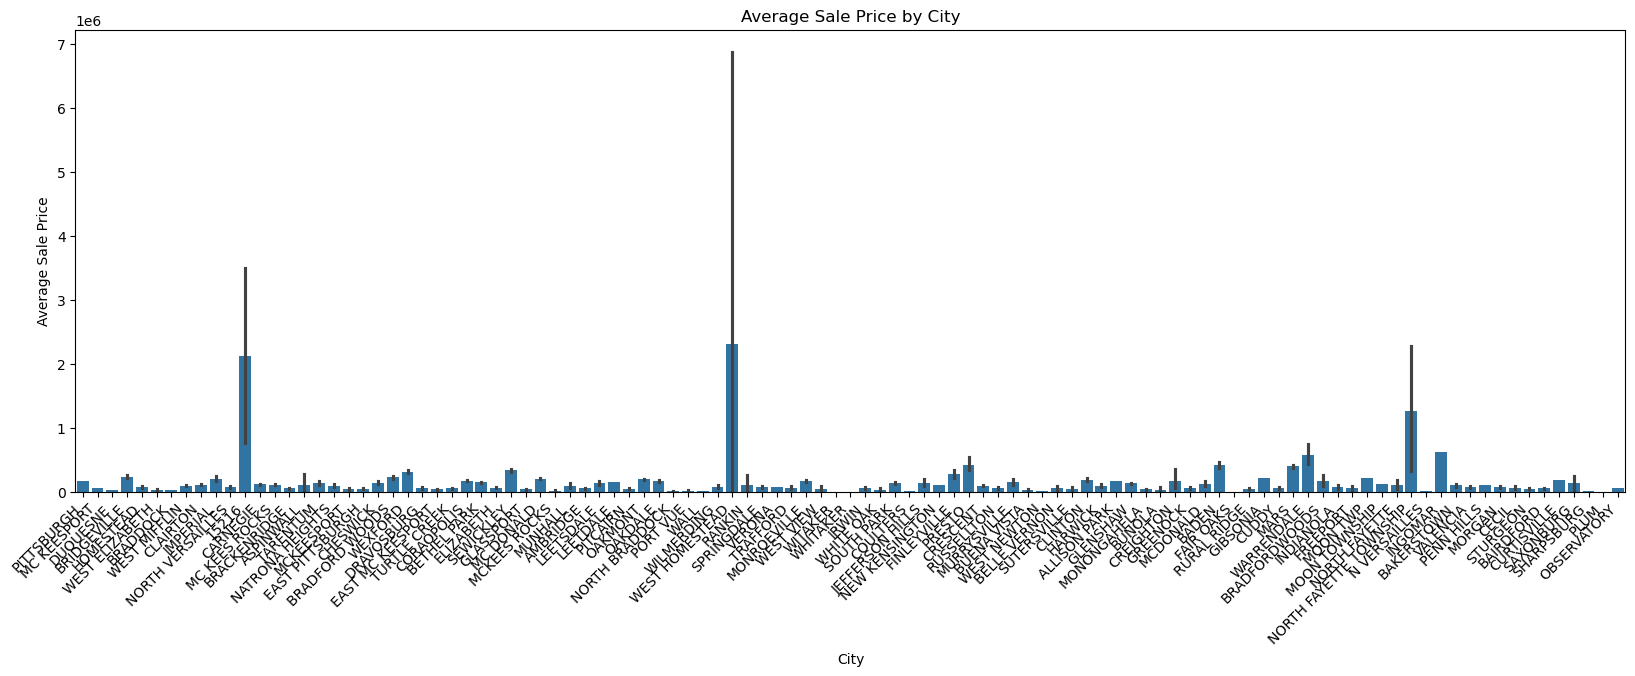

<Figure size 640x480 with 0 Axes>

In [67]:
plt.figure(figsize=(20, 6))
sns.barplot(data=property, x='PROPERTYCITY', y='SALEPRICE')
plt.title('Average Sale Price by City')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Average Sale Price')
plt.xlabel('City')
plt.show()
plt.tight_layout()

**From both the table and the BarGraph it is evident that West Homestead has a marginal lead in terms of SalesPrice.**


### Conclusion

After analyzing each municipalities average square footage and sales price it is evident that the top 6 municipality are as followed:
- Baden
- Pesto
- Mars
- Sewickley
- Wexford
- Bradford Woods

#### Community Survery (Income)

Now we will see which community contains the highest earners. This analysis will help us identify the top communities through top earners.

In [2]:

#importing and displaying the file
survey = pd.read_csv("Community Survey.csv",low_memory=False)
survey.head()

NameError: name 'pd' is not defined

In [1]:
# Total respondents per municipality
total_respondents = survey['municipality'].value_counts()

# High-income respondents per municipality
high_income_respondents = seventy_five['municipality'].value_counts()

# Normalize by dividing high-income counts by total respondents
normalized_proportions = (high_income_respondents / total_respondents) * 100

# Sort by proportion and display the top 10 municipalities
top_normalized_cities = normalized_proportions.sort_values(ascending=False).head(10)

# Display results
print(top_normalized_cities)

NameError: name 'survey' is not defined

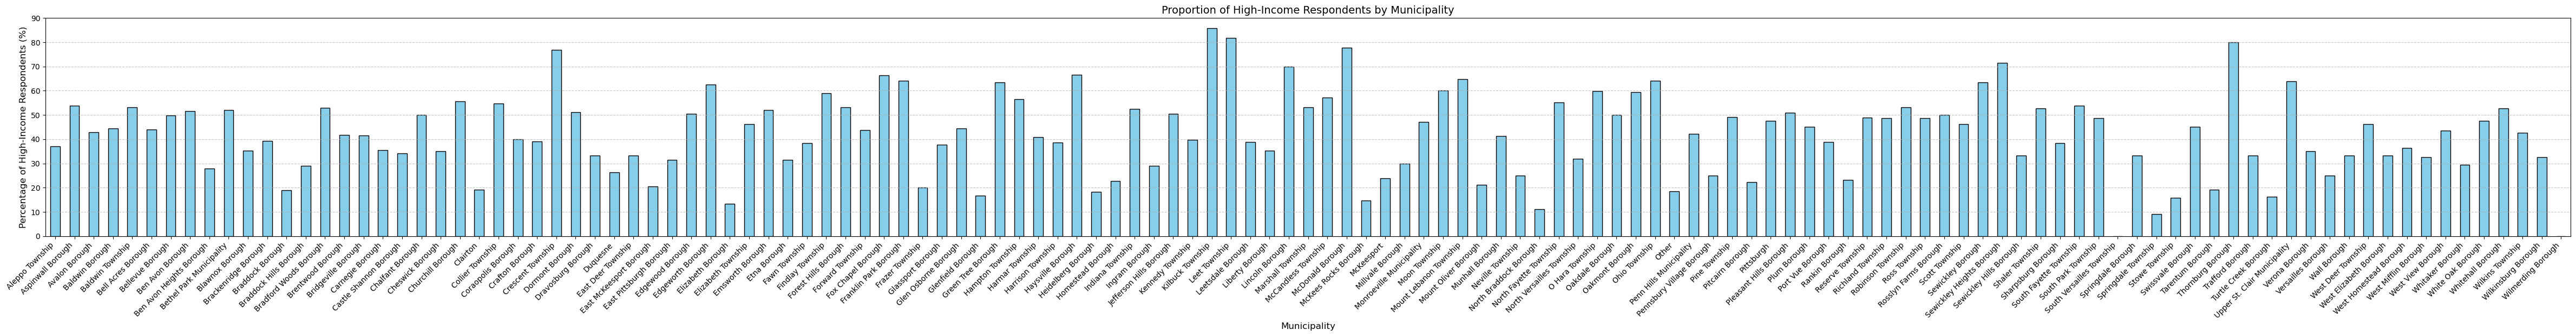

In [115]:
plt.figure(figsize=(48, 5))
normalized_proportions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Proportion of High-Income Respondents by Municipality', fontsize=14)
plt.xlabel('Municipality', fontsize=12)
plt.ylabel('Percentage of High-Income Respondents (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()


**Conclusion**

After analyzing each municipalities proportional income these are the clear top 6
- Kilbuck Township
- Leet Township
- Thornburg Borough
- McDonald Borough
- Crescent Township
- Sewickley Heights Borough

**Median Age of Death**

The best way to rank cities is by their standard of living. The median age of death will provide us with data about in which townships, near Pittsburgh, does an average person live the longest.

In [119]:
#importing and displaying the file
age = pd.read_csv("age.csv",low_memory=False)
survey.head()

,Respondent_ID,Start_Date,language,zip_code,municipality,age,gender,income,race_hisp,lgbtqia,...,arabic_langathome,hindi_langathome,swahili_langathome,french_langathome,german_langathome,portuguese_langathome,asl_langathome,other_langathome,no_languages_athome,non-english_at_home
0,118507525303,2024-01-07 15:27:56.000,en,15235,Wilkins Township,35-44,Woman,I prefer not to answer this question,I prefer not to answer this question,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No
1,118507226179,2024-01-06 20:35:04.000,en,15220,Pittsburgh,75 or older,Woman,"$100,000 to $149,999",Multiracial,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No
2,118507527021,2024-01-07 15:33:35.000,en,15104,Braddock Borough,35-44,Woman,"Less than $25,000",Black or African American,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No
3,118506956404,2024-01-06 10:38:05.000,en,15220,Pittsburgh,35-44,Man,I prefer not to answer this question,I prefer not to answer this question,I prefer not to answer this question,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No
4,118506950110,2024-01-06 10:25:42.000,en,15217,Pittsburgh,18-24,Man,"$25,000 to $39,999",Other,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No


In [129]:
top_10 = age[['Municipality', 'TOTAL MD AGE AT DEATH']].sort_values(by='TOTAL MD AGE AT DEATH', ascending=False).head(10)
print(top_10)

                 Municipality  TOTAL MD AGE AT DEATH
46            Aleppo Township                   88.3
2    Ben Avon Heights Borough                   86.7
97              Mount Lebanon                   86.0
63   Upper St. Clair Township                   85.9
7   Sewickley Heights Borough                   85.9
89     South Fayette Township                   85.6
70        McCandless Township                   85.3
99          Churchill Borough                   85.1
90          Whitehall Borough                   84.8
40          Leetsdale Borough                   84.3


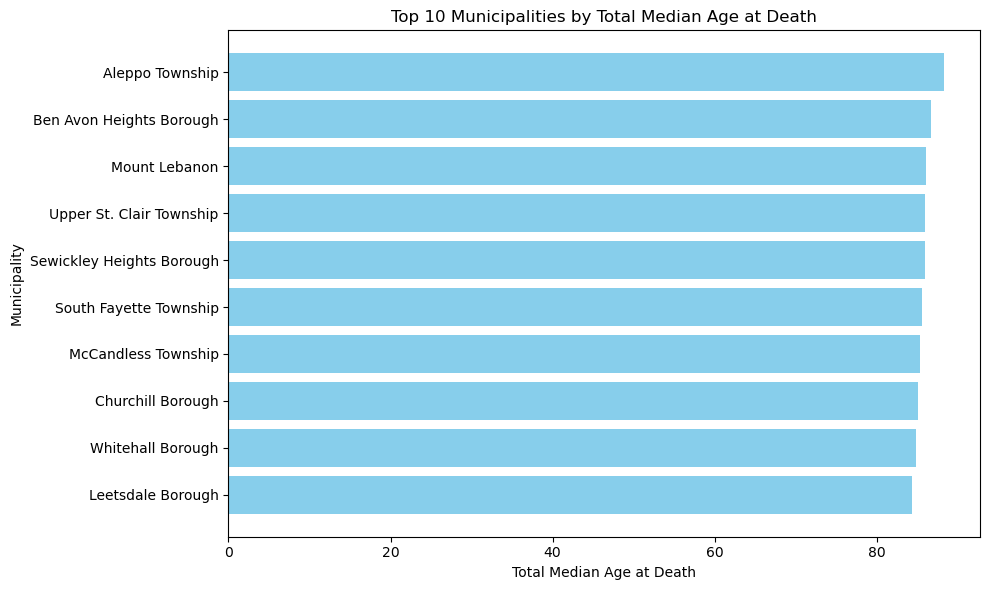

In [131]:
plt.figure(figsize=(10, 6))
plt.barh(top_10['Municipality'], top_10['TOTAL MD AGE AT DEATH'], color='skyblue')
plt.xlabel('Total Median Age at Death')
plt.ylabel('Municipality')
plt.title('Top 10 Municipalities by Total Median Age at Death')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.tight_layout()
plt.show()

**Conclusion**

The top 5 townships with keeping the total median age of death in mind is as followed: 

- Aleppo Township
- Ben Avon Heights Borough
- Mount Lebanon
- Upper St. Clair Township
- Sewickley Heights Borough
- South Fayette Township

**Final Conclusion**

**From Property Assesment:**
- Baden
- Pesto
- Mars
- Sewickley
- Wexford

**From Income:**
- Kilbuck Township
- Leet Township
- Thornburg Borough
- McDonald Borough
- Crescent Township
- Sewickley Heights Borough

**From Median Age of Death:**
- Aleppo Township
- Ben Avon Heights Borough
- Mount Lebanon
- Upper St. Clair Township
- Sewickley Heights Borough


We have the top 6 cities from each of our selected categories. As you can see, Sewickley has seem to made the top 6 in all 3 of our categories, and no other township has done that. Through our research and evident conclusion, we declare **Sewickley** as the best neighborhood in Pittsburgh. 

**Utkarsh:** I, Utkarsh Tiwari, personally would prefer for Wexford to be the best township in Pittsburgh, only because I am from there. I have many facilities near me, for example like Target, Giant Eagle, Walgreens, McKnight Road, McCandless Park and Ride Bus Stop, North Allegheny Senior High School, etc.

**Akhil:** I've lived in Allegheny country for a while and i have always heard murmors of Sewickley being correlated to an expensive and well situated city. So it wasnt a huge shock to label them as the best from our finidngs. However it is important to note that our metric does not capture everything that is present in a good city such as entertainment, industrialiazation, and overall happiness. For that reason I would still prefer where Mars as it is where i feel most comfortobale